## Predictive Analysis for Incidents

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [2]:
# Bring IOT Acceleration Data for analysis
IOT_accel=pd.read_csv('Zoomo_IoT_accel_Cleaned.csv')

In [3]:
# Preview Data
IOT_accel.head()

,Unnamed: 0,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0,0.004313,-0.2607,0.0004,0.1696,0.311
1,1,0.016459,0.0307,0.0412,0.1094,0.121
2,2,0.022998,-0.0977,0.0356,0.0876,0.136
3,3,0.033322,0.0960,0.0820,0.0731,0.146
4,4,0.042877,0.0219,0.0941,0.0491,0.108


In [4]:
# Drop Unnecessary columns and rename columns
IOT_accel.drop(['Unnamed: 0', 'ax (m/s^2)','ay (m/s^2)','az (m/s^2)'], axis=1, inplace=True)
IOT_accel.columns = ['time','Amag']

In [5]:
# Preview Data
IOT_accel.head()

,time,Amag
0,0.004313,0.311
1,0.016459,0.121
2,0.022998,0.136
3,0.033322,0.146
4,0.042877,0.108


In [6]:
# Calculate normalised Amag using 'Max-min' method.

IOT_accel['fAmag_norm'] = ((IOT_accel['Amag'] - IOT_accel['Amag'].min())/ (IOT_accel['Amag'].max() - IOT_accel['Amag'].min()))

In [7]:
# Insert new column time delta
IOT_accel.insert(1,'time_seconds_delta','')

In [8]:
# Calculate time delta
IOT_accel['time_seconds_delta'] = IOT_accel['time'].diff()
IOT_accel['time_seconds_delta']=IOT_accel['time_seconds_delta'].fillna(0)

In [9]:
# Preview Data
IOT_accel.head()

,time,time_seconds_delta,Amag,fAmag_norm
0,0.004313,0.000000,0.311,0.003577
1,0.016459,0.012146,0.121,0.001327
2,0.022998,0.006539,0.136,0.001504
3,0.033322,0.010324,0.146,0.001623
4,0.042877,0.009555,0.108,0.001173


In [10]:
# Bring IOT Gyro Data for analysis
IOT_gyro=pd.read_csv('Zoomo_IoT_gyro_Cleaned.csv')

In [11]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
IOT_gyro['Gmag'] = (IOT_gyro['wx (rad/s)']**2 + IOT_gyro['wy (rad/s)']**2 + IOT_gyro['wz (rad/s)']**2)**0.5

In [12]:
# Calculate normalised Gmag using 'Max-min' method.

IOT_gyro['Gmag_norm'] = ((IOT_gyro['Gmag'] - IOT_gyro['Gmag'].min())/ 
                                     (IOT_gyro['Gmag'].max() - IOT_gyro['Gmag'].min()))

In [13]:
# Drop Unnecessary columns and rename columns

IOT_gyro.drop(['Unnamed: 0', 'wx (rad/s)','wy (rad/s)','wz (rad/s)'], axis=1, inplace=True)
IOT_gyro.columns = ['time','Gmag', 'Gmag_norm']

In [14]:
# Insert new column time delta
IOT_gyro.insert(1,'time_seconds_delta','')

In [15]:
# Calculate time delta
IOT_gyro['time_seconds_delta'] = IOT_gyro['time'].diff()
IOT_gyro['time_seconds_delta']=IOT_gyro['time_seconds_delta'].fillna(0)

In [16]:
# Preview Data
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm
0,0.000821,0.000000,0.0,0.0
1,0.000997,0.000176,0.0,0.0
2,0.001085,0.000088,0.0,0.0
3,0.001171,0.000086,0.0,0.0
4,0.002772,0.001601,0.0,0.0


## accel_7_fast_and_stop - BLR Model

In [17]:
# Import CVS files
accel_7_fast_and_stop = pd.read_csv('accel_7_fast_and_stop_normal_vs_abnormal.csv')

In [18]:
accel_7_fast_and_stop.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ,speed_change,filtered_speed_change,Amag,fAmag,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,65541.234,0.000,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143,0.000,0.000000,1028.490156,170.582059,0.028189,Normal data,Normal data,Normal data
1,1,65541.325,0.091,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572,-183.456,-0.275932,2830.146286,195.592787,0.041602,Normal data,Normal data,Normal data
2,2,65541.416,0.091,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648,-93.184,-1.665485,2161.362533,189.079681,0.038109,Normal data,Normal data,Normal data
3,3,65541.507,0.091,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102,-87.360,-2.953661,1888.000000,191.121952,0.039205,Normal data,Normal data,Normal data
4,4,65541.603,0.096,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789,-116.736,-4.829827,2211.475526,209.737702,0.049189,Normal data,Normal data,Normal data


In [19]:
# Create new column with necessary columns
accel_7_fast_and_stop_copy=accel_7_fast_and_stop[['time_seconds', 'time_seconds_delta', 'fAmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [20]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
accel_7_fast_and_stop_copy=accel_7_fast_and_stop_copy.replace('Normal data', 0)
accel_7_fast_and_stop_copy=accel_7_fast_and_stop_copy.replace('Abnormal data', 1)

In [21]:
accel_7_fast_and_stop_copy.head()

,time_seconds,time_seconds_delta,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,65541.234,0.000,0.028189,0,0,0
1,65541.325,0.091,0.041602,0,0,0
2,65541.416,0.091,0.038109,0,0,0
3,65541.507,0.091,0.039205,0,0,0
4,65541.603,0.096,0.049189,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

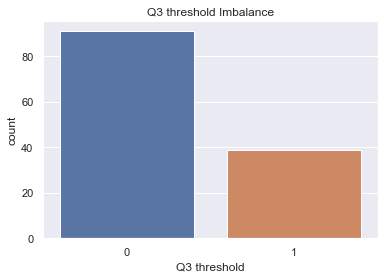

In [22]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data=accel_7_fast_and_stop_copy)
ax.set_title('Q3 threshold Imbalance')

In [23]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

import warnings  
warnings.filterwarnings('ignore')

In [24]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = accel_7_fast_and_stop_copy[nec_cols]
y = accel_7_fast_and_stop_copy.loc[:, accel_7_fast_and_stop_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  fAmag_norm
0               0.722    1.000000
1               0.091    0.039205
2               0.090    0.052155
3               0.094    0.037931
4               3.018    0.101357


,Q3 threshold
0,1
1,0
2,0
3,0
4,0


In [25]:
os_data_y['Q3 threshold'].value_counts()

1    62
0    62
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

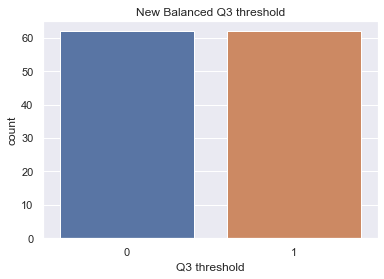

In [26]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

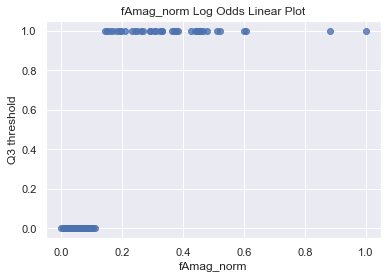

In [27]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

fAmag_norm = sns.regplot(x = 'fAmag_norm',
                  y= 'Q3 threshold',
                  data=accel_7_fast_and_stop_copy,
                  logistic= True).set_title("fAmag_norm Log Odds Linear Plot")

In [28]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_1=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_1.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.405046
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  124
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.4156
Time:                        11:11:44   Log-Likelihood:                -50.226
converged:                       True   LL-Null:                       -85.950
Covariance Type:            nonrobust   LLR p-value:                 2.845e-17
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta    -3.9062      1.034     -3.777      0.000      -5.933      -1.879
fAmag_norm            14.7376      3.399      4.336      0.000       8.076      21.399
======================================================================================
"""

In [29]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [30]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


<AxesSubplot:>

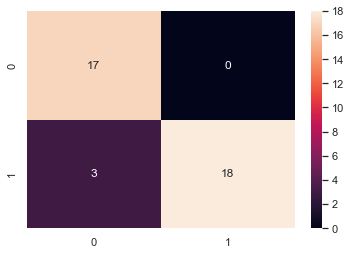

In [31]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [32]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.86      0.92        21

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.93      0.92      0.92        38



In [33]:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = IOT_accel[nec_cols]

In [34]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [35]:
IOT_accel['Accel_7_fast_stop_BLR']=y_pred

In [36]:
IOT_accel.head()

,time,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR
0,0.004313,0.000000,0.311,0.003577,0
1,0.016459,0.012146,0.121,0.001327,0
2,0.022998,0.006539,0.136,0.001504,0
3,0.033322,0.010324,0.146,0.001623,0
4,0.042877,0.009555,0.108,0.001173,0


In [37]:
IOT_accel['Accel_7_fast_stop_BLR'].value_counts()

0    81763
1     2389
Name: Accel_7_fast_stop_BLR, dtype: int64

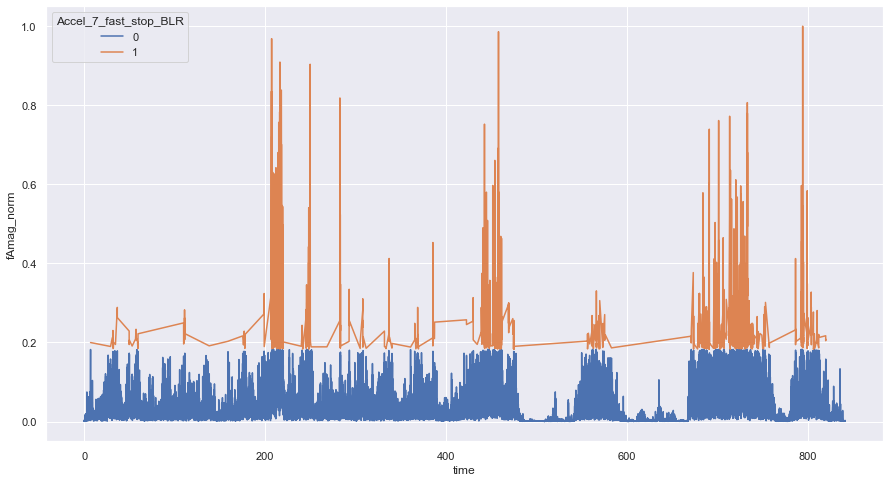

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_accel, x='time', y='fAmag_norm', hue='Accel_7_fast_stop_BLR')
plt.savefig('Accel 7 Fast Stop.png')  

## Gyro_1_curb_up - BLR Model

In [39]:
Gyro_1_curb_up=pd.read_csv('Gyro_1_curb_up_normal_vs_abnormal.csv')

In [40]:
Gyro_1_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68004.751,0.000,18:53:24:751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
1,1,68004.841,0.090,18:53:24:841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
2,2,68004.930,0.089,18:53:24:930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
3,3,68005.023,0.093,18:53:25:023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
4,4,68005.113,0.090,18:53:25:113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data


In [41]:
# Create new column with necessary columns
Gyro_1_curb_up_copy = Gyro_1_curb_up[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [42]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_1_curb_up_copy = Gyro_1_curb_up_copy.replace('Normal data', 0)
Gyro_1_curb_up_copy = Gyro_1_curb_up_copy.replace('Abnormal data', 1)

In [43]:
Gyro_1_curb_up_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68004.751,0.000,0.10137,0,0,0
1,68004.841,0.090,0.10137,0,0,0
2,68004.930,0.089,0.10137,0,0,0
3,68005.023,0.093,0.10137,0,0,0
4,68005.113,0.090,0.10137,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

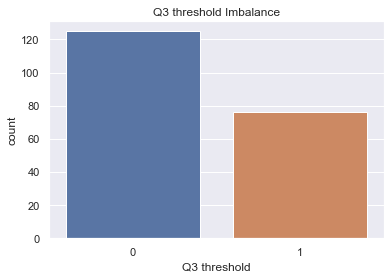

In [44]:
# Create a plot with Seaborn.
sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data = Gyro_1_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [45]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_1_curb_up_copy[nec_cols]
y = Gyro_1_curb_up_copy.loc[:, Gyro_1_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  Gmag_norm
0               0.178   0.000000
1               0.091   0.398645
2               0.092   0.101370
3               0.089   0.155570
4               0.093   0.000000


,Q3 threshold
0,0
1,1
2,0
3,0
4,0


In [46]:
os_data_y['Q3 threshold'].value_counts()

0    85
1    85
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

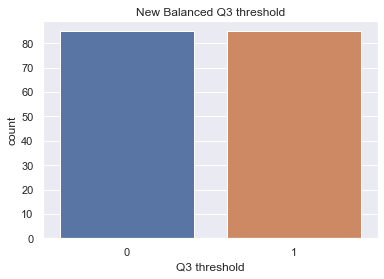

In [47]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

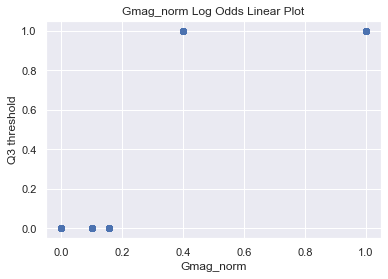

In [48]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

Gmag_norm = sns.regplot(x = 'Gmag_norm',
                  y = 'Q3 threshold',
                  data = Gyro_1_curb_up_copy,
                  logistic = True).set_title("Gmag_norm Log Odds Linear Plot")

In [49]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_2=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_2.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.067294
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.9029
Time:                        11:11:56   Log-Likelihood:                -11.440
converged:                       True   LL-Null:                       -117.84
Covariance Type:            nonrobust   LLR p-value:                 3.382e-48
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta   -78.0108     20.956     -3.723      0.000    -119.083     -36.938
Gmag_norm             35.9484     11.552      3.112      0.002      13.307      58.590
======================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [50]:
# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [51]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


<AxesSubplot:>

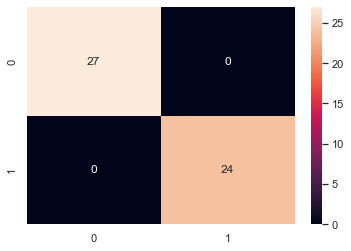

In [52]:
# Create the confusion matrix to test classification accuracy in BLR: 
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [53]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        24

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [54]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']
X = IOT_gyro[nec_cols]

In [55]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [56]:
IOT_gyro['IOT_gyro_1_curb_up_BLR']=y_pred

In [57]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR
0,0.000821,0.000000,0.0,0.0,0
1,0.000997,0.000176,0.0,0.0,0
2,0.001085,0.000088,0.0,0.0,0
3,0.001171,0.000086,0.0,0.0,0
4,0.002772,0.001601,0.0,0.0,0


In [58]:
IOT_gyro['IOT_gyro_1_curb_up_BLR'].value_counts()

0    512027
1      6194
Name: IOT_gyro_1_curb_up_BLR, dtype: int64

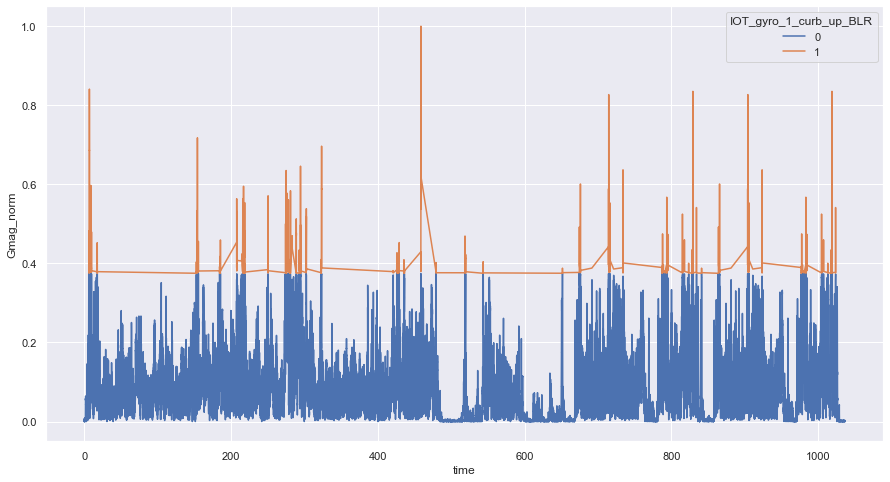

In [59]:
plt.figure(figsize = (15,8))
sns.lineplot(data = IOT_gyro, x='time', y='Gmag_norm', hue='IOT_gyro_1_curb_up_BLR')
plt.savefig("Gyro_1_curb_up.png")

## Gyro_2_curb_up - BLR Model

In [60]:
Gyro_2_curb_up=pd.read_csv('Gyro_2_curb_up_normal_vs_abnormal.csv')

In [61]:
Gyro_2_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68043.946,0.000,18:54:03:946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
1,1,68044.082,0.136,18:54:04:082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
2,2,68044.176,0.094,18:54:04:176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
3,3,68044.261,0.085,18:54:04:261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
4,4,68044.357,0.096,18:54:04:357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data


In [62]:
# Create new column with necessary columns
Gyro_2_curb_up_copy = Gyro_2_curb_up[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [63]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_2_curb_up_copy = Gyro_2_curb_up_copy.replace('Normal data', 0)
Gyro_2_curb_up_copy = Gyro_2_curb_up_copy.replace('Abnormal data', 1)

In [64]:
Gyro_2_curb_up_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68043.946,0.000,0.0,0,0,0
1,68044.082,0.136,0.0,0,0,0
2,68044.176,0.094,0.0,0,0,0
3,68044.261,0.085,0.0,0,0,0
4,68044.357,0.096,0.0,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

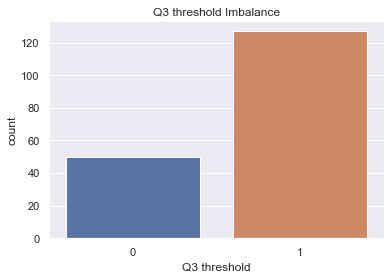

In [65]:
# Create a plot with Seaborn.

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data = Gyro_2_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [66]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_2_curb_up_copy[nec_cols]
y = Gyro_2_curb_up_copy.loc[:, Gyro_2_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  Gmag_norm
0               0.089   0.000000
1               0.136   1.000000
2               0.271   1.000000
3               0.088   1.000000
4               0.094   0.571989


,Q3 threshold
0,0
1,1
2,1
3,1
4,1


In [67]:
os_data_y['Q3 threshold'].value_counts()

0    88
1    88
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

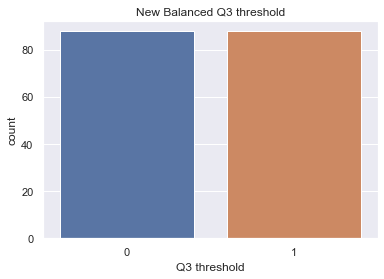

In [68]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

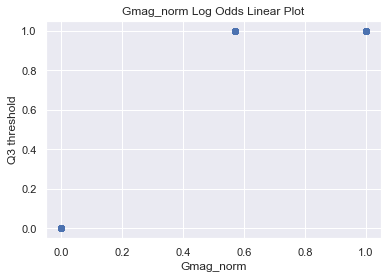

In [69]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

Gmag_norm = sns.regplot(x = 'Gmag_norm',
                  y = 'Q3 threshold',
                  data = Gyro_2_curb_up_copy,
                  logistic = True).set_title("Gmag_norm Log Odds Linear Plot")

In [70]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_3=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_3.fit()  

# Print the results.
result.summary()

         Current function value: 0.003939
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                  176
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.9943
Time:                        11:12:18   Log-Likelihood:               -0.69324
converged:                      False   LL-Null:                       -121.99
Covariance Type:            nonrobust   LLR p-value:                 1.065e-54
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta  -377.3057   4284.565     -0.088      0.930   -8774.900    8020.288
Gmag_norm            142.6422   1498.544      0.095      0.924   -2794.450    3079.735
======================================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [71]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [72]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


<AxesSubplot:>

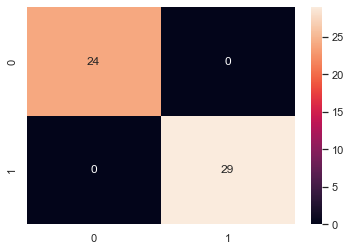

In [73]:
# Create the confusion matrix to test classification accuracy in BLR: 
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [74]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [75]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']
X = IOT_gyro[nec_cols]

In [76]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [77]:
IOT_gyro['IOT_gyro_2_curb_up_BLR']=y_pred

In [78]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR
0,0.000821,0.000000,0.0,0.0,0,0
1,0.000997,0.000176,0.0,0.0,0,0
2,0.001085,0.000088,0.0,0.0,0,0
3,0.001171,0.000086,0.0,0.0,0,0
4,0.002772,0.001601,0.0,0.0,0,0


In [79]:
IOT_gyro['IOT_gyro_2_curb_up_BLR'].value_counts()

0    512716
1      5505
Name: IOT_gyro_2_curb_up_BLR, dtype: int64

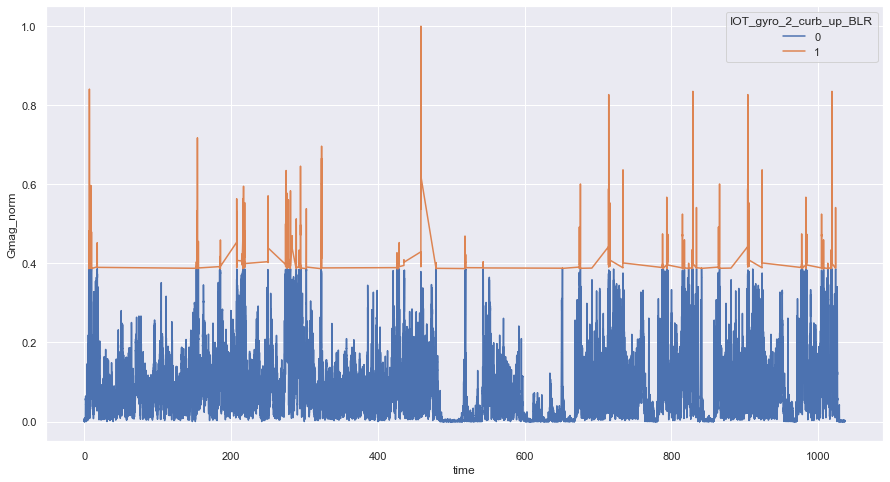

In [80]:
plt.figure(figsize = (15,8))
sns.lineplot(data = IOT_gyro, x='time', y='Gmag_norm', hue='IOT_gyro_2_curb_up_BLR')
plt.savefig("Gyro_2_curb_up.png")

## BLR model could not fit on Gyro_3_curb_up file. Therefore excluded from analysis.
PerfectSeparationError: Perfect separation detected, results not available


## BLR model could not fit on Gyro_4_throwing_bike file. Therefore excluded from analysis.

Warning: Maximum number of iterations has been exceeded.
         Current function value: inf
         Iterations: 35
            
LinAlgError: Singular matrix


## BLR model could not fit on Gyro_5_throwing_bike file. Therefore excluded from analysis.

Warning: Maximum number of iterations has been exceeded.
         Current function value: inf
         Iterations: 35
            
LinAlgError: Singular matrix

## Since we dont have a working model for throw bike incident, decided to built Decision Tree Model for this incident.

## Gyro_4_throwing_bike - DTC

In [81]:
Gyro_4_throwing_bike=pd.read_csv('Gyro_4_throwing_bike_normal_vs_abnormal.csv')

In [82]:
Gyro_4_throwing_bike.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
1,1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
2,2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
3,3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
4,4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data


In [83]:
# Create new df with necessary columns
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [84]:
# Replace Normal Data as 0 and Abnormal Data as 1
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike_copy.replace('Normal data', 0)
Gyro_4_throwing_bike_copy=Gyro_4_throwing_bike_copy.replace('Abnormal data', 1)

In [85]:
Gyro_4_throwing_bike_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68143.665,0.000,0.848702,1,1,1
1,68143.800,0.135,0.848702,1,1,1
2,68143.891,0.091,0.848702,1,1,1
3,68144.027,0.136,0.848702,1,1,1
4,68144.117,0.090,0.848702,1,1,1


In [86]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_4_throwing_bike_copy[nec_cols]
y = Gyro_4_throwing_bike_copy['Q3 threshold']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Q3 threshold'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  164


,Q3 threshold
0,1
1,0
2,0
3,0
4,0
...,...
159,1
160,1
161,1
162,1


In [87]:
os_data_y.value_counts()

Q3 threshold
0               82
1               82
dtype: int64

In [88]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc: 
dtc_1 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc_1 = dtc_1.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc_1.predict(X_test) 

In [89]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[37  0]
 [ 0 18]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        18

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



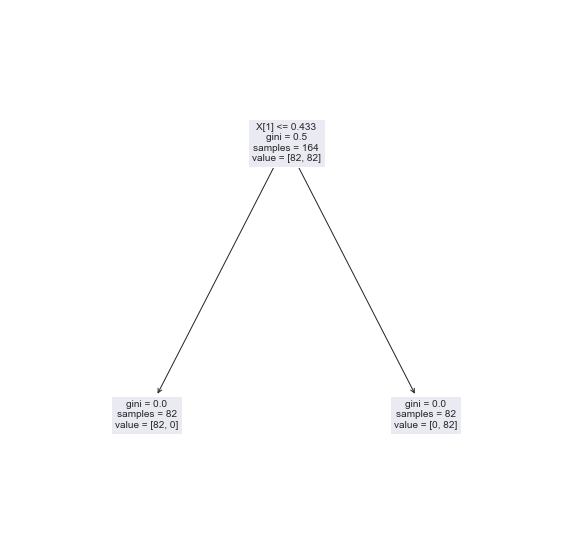

In [91]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc_1, fontsize=10)

# Print the plot with plt.show().
plt.show()  

In [92]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = IOT_gyro[nec_cols]

In [93]:
# Predict the abnormal behaviour
y_pred = dtc_1.predict(X) 

In [94]:
IOT_gyro['Throw_bike_Gyro_4_DTC']=y_pred

In [95]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC
0,0.000821,0.000000,0.0,0.0,0,0,0
1,0.000997,0.000176,0.0,0.0,0,0,0
2,0.001085,0.000088,0.0,0.0,0,0,0
3,0.001171,0.000086,0.0,0.0,0,0,0
4,0.002772,0.001601,0.0,0.0,0,0,0


In [96]:
IOT_gyro['Throw_bike_Gyro_4_DTC'].value_counts()

0    514703
1      3518
Name: Throw_bike_Gyro_4_DTC, dtype: int64

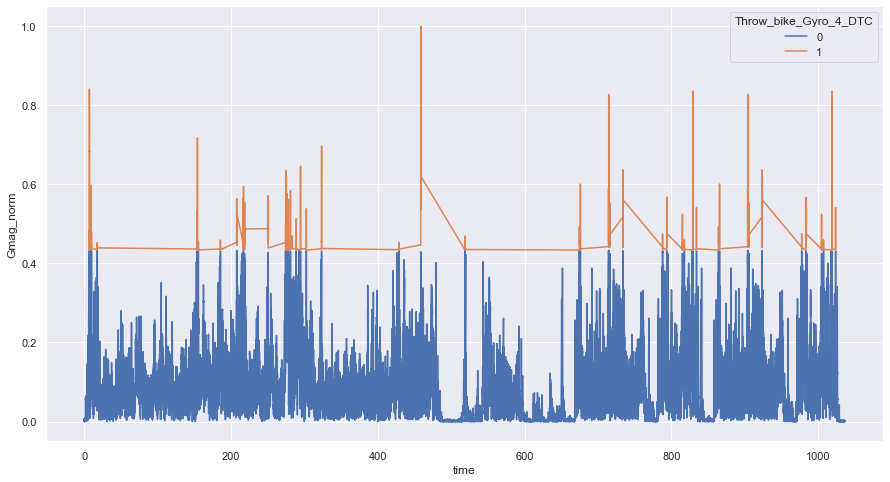

In [97]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_gyro, x='time', y='Gmag_norm', hue='Throw_bike_Gyro_4_DTC')
plt.savefig("Throw Bike Gyro 4.png")

## Gyro_5_throwing_bike - DTC

In [98]:
Gyro_5_throwing_bike=pd.read_csv('Gyro_5_throwing_bike_normal_vs_abnormal.csv')

In [99]:
Gyro_5_throwing_bike.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
1,1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
2,2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
3,3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
4,4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data


In [100]:
# Create new df with necessary columns
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike[['time_seconds', 'time_seconds_delta', 'Gmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [101]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike_copy.replace('Normal data', 0)
Gyro_5_throwing_bike_copy=Gyro_5_throwing_bike_copy.replace('Abnormal data', 1)

In [102]:
Gyro_5_throwing_bike_copy.head()

,time_seconds,time_seconds_delta,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68196.812,0.000,0.0,0,0,0
1,68196.902,0.090,0.0,0,0,0
2,68196.992,0.090,0.0,0,0,0
3,68197.082,0.090,0.0,0,0,0
4,68197.171,0.089,0.0,0,0,0


In [103]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = Gyro_5_throwing_bike_copy[nec_cols]
y = Gyro_5_throwing_bike_copy['Q3 threshold']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Q3 threshold'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  68


,Q3 threshold
0,1
1,0
2,0
3,0
4,1
...,...
63,1
64,1
65,1
66,1


In [104]:
os_data_y.value_counts()

Q3 threshold
0               34
1               34
dtype: int64

In [105]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc: 
dtc_2 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc_2 = dtc_2.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc_2.predict(X_test) 

In [106]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[18  0]
 [ 0 12]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



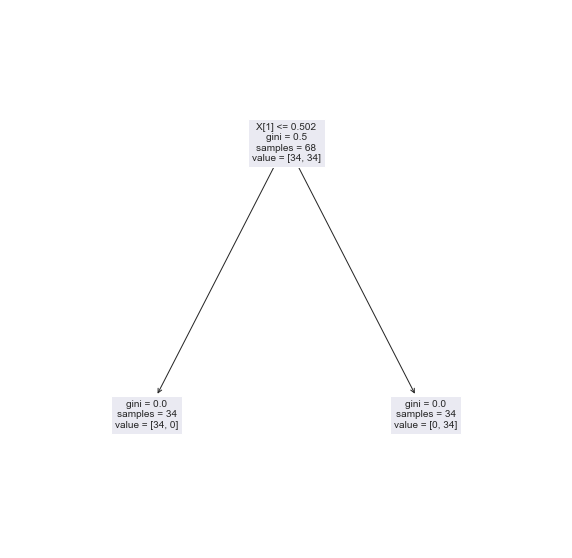

In [108]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc_2, fontsize=10)

# Print the plot with plt.show().
plt.show()  

In [109]:
nec_cols = [ 'time_seconds_delta', 'Gmag_norm']

X = IOT_gyro[nec_cols]

In [110]:
# Predict the abnormal behaviour
y_pred = dtc_2.predict(X) 

In [111]:
IOT_gyro['Throw_bike_Gyro_5_DTC']=y_pred

In [112]:
IOT_gyro.head()

,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.000821,0.000000,0.0,0.0,0,0,0,0
1,0.000997,0.000176,0.0,0.0,0,0,0,0
2,0.001085,0.000088,0.0,0.0,0,0,0,0
3,0.001171,0.000086,0.0,0.0,0,0,0,0
4,0.002772,0.001601,0.0,0.0,0,0,0,0


In [113]:
IOT_gyro['Throw_bike_Gyro_5_DTC'].value_counts()

0    516510
1      1711
Name: Throw_bike_Gyro_5_DTC, dtype: int64

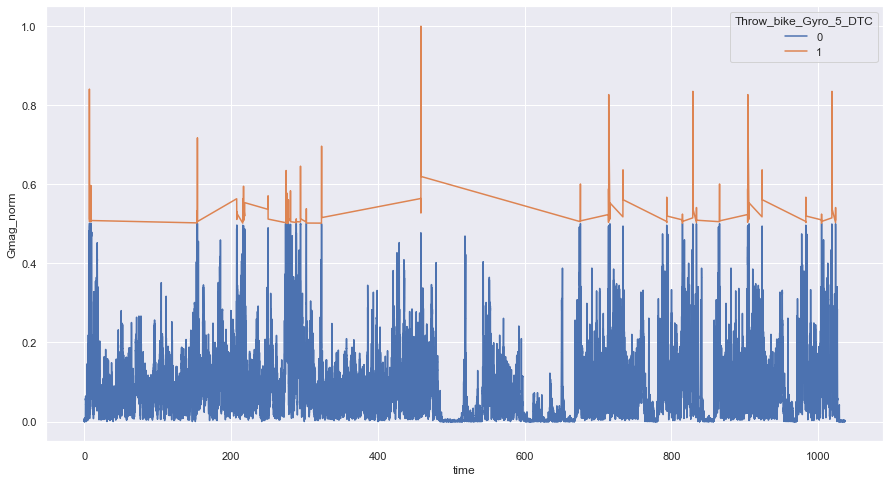

In [114]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_gyro, x='time', y='Gmag_norm', hue='Throw_bike_Gyro_5_DTC')
plt.savefig("Throw Bike Gyro 5.png")

## accel_8_curb_up - BLR Model

In [115]:
# Import CVS files
accel_8_curb_up = pd.read_csv('accel_8_curb_up_normal_vs_abnormal.csv')

In [116]:
accel_8_curb_up.head()

,Unnamed: 0,time_seconds,time_seconds_delta,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,fAmag,fAmag_norm,Std threshold,Q3 threshold,HO threshold
0,0,0.000,0.000,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805,2313.978392,44.747875,0.000000,Normal data,Normal data,Normal data
1,1,4.321,4.321,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575,1971.314282,50.168686,0.003468,Normal data,Normal data,Normal data
2,2,5.087,0.766,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961,3116.510870,54.141615,0.006010,Normal data,Normal data,Normal data
3,3,5.399,0.312,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812,3954.816810,113.500265,0.043984,Normal data,Normal data,Normal data
4,4,5.715,0.316,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729,4897.672917,192.068194,0.094247,Normal data,Normal data,Normal data


In [117]:
# Create new column with necessary columns
accel_8_curb_up_copy=accel_8_curb_up[['time_seconds', 'time_seconds_delta', 'fAmag_norm', 'Q3 threshold','Std threshold', 'HO threshold']]

In [118]:
# Replace Normal Data as 0 and Abnormal Data as 1
# Assumptions for BLR
# Assumption 1: Binary logistic regression requires the dependent variable to be binary.
# Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
accel_8_curb_up_copy=accel_8_curb_up_copy.replace('Normal data', 0)
accel_8_curb_up_copy=accel_8_curb_up_copy.replace('Abnormal data', 1)

In [119]:
accel_8_curb_up_copy.head()

,time_seconds,time_seconds_delta,fAmag_norm,Q3 threshold,Std threshold,HO threshold
0,0.000,0.000,0.000000,0,0,0
1,4.321,4.321,0.003468,0,0,0
2,5.087,0.766,0.006010,0,0,0
3,5.399,0.312,0.043984,0,0,0
4,5.715,0.316,0.094247,0,0,0


Text(0.5, 1.0, 'Q3 threshold Imbalance')

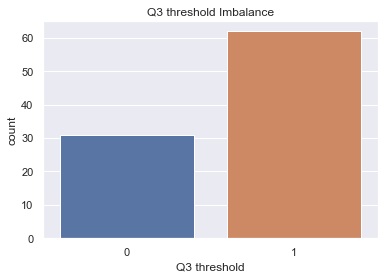

In [120]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Q3 threshold', data=accel_8_curb_up_copy)
ax.set_title('Q3 threshold Imbalance')

In [121]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

import warnings  
warnings.filterwarnings('ignore')

In [122]:
# Select necessary columns: 
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = accel_8_curb_up_copy[nec_cols]
y = accel_8_curb_up_copy.loc[:, accel_8_curb_up_copy.columns =='Q3 threshold']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Q3 threshold'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   time_seconds_delta  fAmag_norm
0               0.357    0.100639
1               0.315    0.101171
2               0.087    0.099247
3               0.312    0.043984
4               0.135    0.106020


,Q3 threshold
0,0
1,0
2,0
3,0
4,0


In [123]:
os_data_y['Q3 threshold'].value_counts()

0    42
1    42
Name: Q3 threshold, dtype: int64

Text(0.5, 1.0, 'New Balanced Q3 threshold')

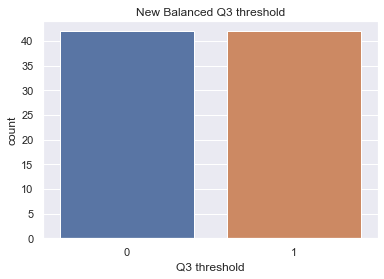

In [124]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Q3 threshold', data = os_data_y)
ax.set_title("New Balanced Q3 threshold")

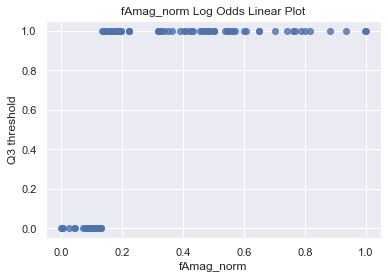

In [125]:
# The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). 
#However, the Box-Tidwell test is only applicable to continuous variables.

fAmag_norm = sns.regplot(x = 'fAmag_norm',
                  y= 'Q3 threshold',
                  data=accel_8_curb_up_copy,
                  logistic= True).set_title("fAmag_norm Log Odds Linear Plot")

In [126]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Q3 threshold']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model_1=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model_1.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.480701
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Q3 threshold   No. Observations:                   84
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.3065
Time:                        11:13:09   Log-Likelihood:                -40.379
converged:                       True   LL-Null:                       -58.224
Covariance Type:            nonrobust   LLR p-value:                 2.312e-09
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_seconds_delta    -4.4955      1.601     -2.808      0.005      -7.633      -1.358
fAmag_norm             7.0316      1.930      3.643      0.000       3.248      10.815
======================================================================================
"""

In [127]:
# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

LogisticRegression()

In [128]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


<AxesSubplot:>

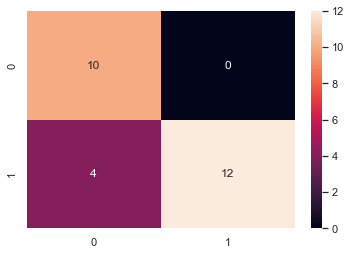

In [129]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [130]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.75      0.86        16

    accuracy                           0.85        26
   macro avg       0.86      0.88      0.85        26
weighted avg       0.89      0.85      0.85        26



In [131]:
nec_cols = [ 'time_seconds_delta', 'fAmag_norm']

X = IOT_accel[nec_cols]

In [132]:
# Predict the abnormal behaviour
y_pred = logreg.predict(X)

In [133]:
IOT_accel['accel_8_curb_up_BLR']=y_pred

In [134]:
IOT_accel.head()

,time,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR
0,0.004313,0.000000,0.311,0.003577,0,0
1,0.016459,0.012146,0.121,0.001327,0,0
2,0.022998,0.006539,0.136,0.001504,0,0
3,0.033322,0.010324,0.146,0.001623,0,0
4,0.042877,0.009555,0.108,0.001173,0,0


In [135]:
IOT_accel['accel_8_curb_up_BLR'].value_counts()

0    83352
1      800
Name: accel_8_curb_up_BLR, dtype: int64

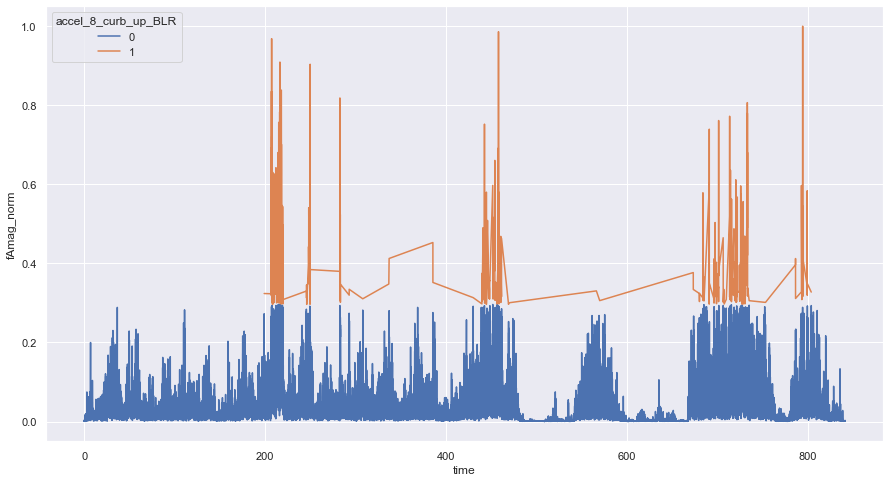

In [136]:
plt.figure(figsize=(15,8))
sns.lineplot(data=IOT_accel, x='time', y='fAmag_norm', hue='accel_8_curb_up_BLR')
plt.savefig("Accel 8 Curb up.png")

## Merging IOT Accel & Gyro Data

In [137]:
# Merge accel and gyro data
IOT_accel.merge(IOT_gyro, on='time')

,time,time_seconds_delta_x,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,time_seconds_delta_y,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,4.343270,0.010478,0.567,0.006610,0,0,0.001573,0.066332,0.017194,0,0,0,0
1,16.252381,0.009662,3.761,0.044444,0,0,0.001946,0.668805,0.173359,0,0,0,0
2,25.332511,0.004747,0.319,0.003672,0,0,0.001786,0.071414,0.018511,0,0,0,0
3,31.012050,0.009781,0.618,0.007214,0,0,0.001784,0.037417,0.009699,0,0,0,0
4,92.560650,0.009722,13.368,0.158243,0,0,0.001979,0.286531,0.074271,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,755.263645,0.006105,3.031,0.035797,0,0,0.001896,0.292233,0.075749,0,0,0,0
59,775.645831,0.012654,0.072,0.000746,0,0,0.002855,0.070000,0.018145,0,0,0,0
60,781.102796,0.009592,0.970,0.011383,0,0,0.002024,0.000000,0.000000,0,0,0,0
61,784.232889,0.009173,2.590,0.030573,0,0,0.001773,0.126886,0.032890,0,0,0,0


There is only 63 points that match with the same timestamp. It reduce the data size considerably from over 500k Gyro rows and 80k Accel rows. We need to try and come up with a way to map data, so will look at rounding the timestamp to a larger value (currently timestamps are to the nearest microsecond - millionth of a second!). We will look at appropriate groupings - milliseconds, hundreths of seconds and tenths of seconds

## Grouping Data into Millisecond groups

In [138]:
# Acceleration data
# Insert new columns for  time in 0.001 seconds 
IOT_accel.insert(1,'milliseconds_group','')

In [139]:
# Calculate 0.001 seconds column
IOT_accel['milliseconds_group'] = round(IOT_accel['time'] / 0.001 , 0)

In [140]:
# Groupby the data in 0.001 seconds durations
IOT_accel_2 = IOT_accel.groupby(by='milliseconds_group', as_index=False).mean()

In [141]:
# Check the data
IOT_accel_2.head()

,milliseconds_group,time,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR
0,4.0,0.004313,0.000000,0.311,0.003577,0.0,0.0
1,16.0,0.016459,0.012146,0.121,0.001327,0.0,0.0
2,23.0,0.022998,0.006539,0.136,0.001504,0.0,0.0
3,33.0,0.033322,0.010324,0.146,0.001623,0.0,0.0
4,43.0,0.042877,0.009555,0.108,0.001173,0.0,0.0


In [142]:
# Gyro data
# Insert new columns for  time in 0.001 seconds 
IOT_gyro.insert(1,'milliseconds_group','')

In [143]:
# Calculate 0.001 seconds column
IOT_gyro['milliseconds_group'] = round(IOT_gyro['time'] / 0.001 , 0)

In [144]:
# Groupby the dsata in 0.001 seconds durations
IOT_gyro_2 = IOT_gyro.groupby(by='milliseconds_group', as_index=False).mean()

In [145]:
# Check the data
IOT_gyro_2.head()

,milliseconds_group,time,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,1.0,0.001019,0.000087,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.002772,0.001601,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.005532,0.002760,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,0.006627,0.001095,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.008677,0.002050,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Merge accel_2 and gyro_2 data using new group
IOT_accel_gyro_merge = IOT_accel_2.merge(IOT_gyro_2, on='milliseconds_group')

In [147]:
# Check the data
IOT_accel_gyro_merge

,milliseconds_group,time_x,time_seconds_delta_x,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,time_y,time_seconds_delta_y,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,16.0,0.016459,0.012146,0.121,0.001327,0.0,0.0,0.015778,0.001496,0.000000,0.000000,0.0,0.0,0.0,0.0
1,23.0,0.022998,0.006539,0.136,0.001504,0.0,0.0,0.022668,0.002030,0.000000,0.000000,0.0,0.0,0.0,0.0
2,33.0,0.033322,0.010324,0.146,0.001623,0.0,0.0,0.032769,0.000768,0.024495,0.006349,0.0,0.0,0.0,0.0
3,43.0,0.042877,0.009555,0.108,0.001173,0.0,0.0,0.043080,0.002181,0.014142,0.003666,0.0,0.0,0.0,0.0
4,53.0,0.053217,0.010340,0.109,0.001185,0.0,0.0,0.052742,0.001908,0.010000,0.002592,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41861,841241.0,841.241451,0.007602,0.091,0.000971,0.0,0.0,841.241480,0.001054,1.496229,0.387834,1.0,1.0,0.0,0.0
41862,841263.0,841.262967,0.009308,0.106,0.001149,0.0,0.0,841.263438,0.001655,1.494456,0.387374,1.0,1.0,0.0,0.0
41863,841283.0,841.282601,0.008787,0.083,0.000877,0.0,0.0,841.283223,0.001870,1.485968,0.385174,1.0,0.0,0.0,0.0
41864,841294.0,841.294024,0.011423,0.073,0.000758,0.0,0.0,841.294020,0.002296,1.474347,0.382162,1.0,0.0,0.0,0.0


In [148]:
# count of data points remaining following millisecond grouping

print(f"{len(IOT_accel_2)} rows in accelerometer data")
print(f"{len(IOT_gyro_2)} rows in gyro data")
print(f"{len(IOT_accel_gyro_merge)} rows in merged data")
print(f"{round((len(IOT_accel_gyro_merge)/len(IOT_accel_2))*100,1)} % accel data in merged data")
print(f"{round((len(IOT_accel_gyro_merge)/len(IOT_gyro_2))*100,1)} % accel data in merged data")

84008 rows in accelerometer data
456211 rows in gyro data
41866 rows in merged data
49.8 % accel data in merged data
9.2 % accel data in merged data


## Grouping Data into Hundredth of a Second groups

In [149]:
# Acceleration data
# Insert new columns for  time in 0.001 seconds 
IOT_accel.insert(1,'hundseconds_group','')

In [150]:
# Calculate 0.001 seconds column
IOT_accel['hundseconds_group'] = round(IOT_accel['time'] / 0.01 , 0)

In [151]:
# Groupby the data in 0.001 seconds durations
IOT_accel_3 = IOT_accel.groupby(by='hundseconds_group', as_index=False).mean()

In [152]:
# Check the data
IOT_accel_3.head()

,hundseconds_group,time,milliseconds_group,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR
0,0.0,0.004313,4.0,0.000000,0.3110,0.003577,0.0,0.0
1,2.0,0.019729,19.5,0.009343,0.1285,0.001416,0.0,0.0
2,3.0,0.033322,33.0,0.010324,0.1460,0.001623,0.0,0.0
3,4.0,0.042877,43.0,0.009555,0.1080,0.001173,0.0,0.0
4,5.0,0.053217,53.0,0.010340,0.1090,0.001185,0.0,0.0


In [153]:
# Gyro data
# Insert new columns for  time in 0.001 seconds 
IOT_gyro.insert(1,'hundseconds_group','')

In [154]:
# Calculate 0.001 seconds column
IOT_gyro['hundseconds_group'] = round(IOT_gyro['time'] / 0.01 , 0)

In [155]:
# Groupby the dsata in 0.001 seconds durations
IOT_gyro_3 = IOT_gyro.groupby(by='hundseconds_group', as_index=False).mean()

In [156]:
# Check the data
IOT_gyro_3.head()

,hundseconds_group,time,milliseconds_group,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.0,0.001369,1.4,0.000390,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1.0,0.009171,9.4,0.002302,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2.0,0.019056,19.2,0.001677,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3.0,0.029320,29.4,0.002020,0.009727,0.002521,0.0,0.0,0.0,0.0
4,4.0,0.039163,39.2,0.002062,0.017484,0.004532,0.0,0.0,0.0,0.0


In [157]:
# Merge accel_2 and gyro_2 data using new group
IOT_accel_gyro_merge_2 = IOT_accel_3.merge(IOT_gyro_3, on='hundseconds_group')

In [158]:
# Check the data
IOT_accel_gyro_merge_2

,hundseconds_group,time_x,milliseconds_group_x,time_seconds_delta_x,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,time_y,milliseconds_group_y,time_seconds_delta_y,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.0,0.004313,4.0,0.000000,0.3110,0.003577,0.0,0.0,0.001369,1.400000,0.000390,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2.0,0.019729,19.5,0.009343,0.1285,0.001416,0.0,0.0,0.019056,19.200000,0.001677,0.000000,0.000000,0.0,0.0,0.0,0.0
2,3.0,0.033322,33.0,0.010324,0.1460,0.001623,0.0,0.0,0.029320,29.400000,0.002020,0.009727,0.002521,0.0,0.0,0.0,0.0
3,4.0,0.042877,43.0,0.009555,0.1080,0.001173,0.0,0.0,0.039163,39.200000,0.002062,0.017484,0.004532,0.0,0.0,0.0,0.0
4,5.0,0.053217,53.0,0.010340,0.1090,0.001185,0.0,0.0,0.049252,49.400000,0.001932,0.010000,0.002592,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76830,84135.0,841.352187,841352.0,0.009778,0.1080,0.001173,0.0,0.0,841.348974,841348.750000,0.002033,1.411652,0.365911,0.0,0.0,0.0,0.0
76831,84136.0,841.361548,841362.0,0.009361,0.1120,0.001220,0.0,0.0,841.359256,841359.333333,0.002053,1.373008,0.355894,0.0,0.0,0.0,0.0
76832,84137.0,841.373064,841373.0,0.011516,0.0850,0.000900,0.0,0.0,841.369802,841369.600000,0.002033,1.326732,0.343899,0.0,0.0,0.0,0.0
76833,84138.0,841.384332,841384.0,0.011268,0.2600,0.002973,0.0,0.0,841.379843,841379.600000,0.001908,1.277322,0.331091,0.0,0.0,0.0,0.0


In [159]:
# count of data points remaining following millisecond grouping

print(f"{len(IOT_accel_3)} rows in accelerometer data")
print(f"{len(IOT_gyro_3)} rows in gyro data")
print(f"{len(IOT_accel_gyro_merge_2)} rows in merged data")
print(f"{round((len(IOT_accel_gyro_merge_2)/len(IOT_accel_3))*100,1)} % accel data in merged data")
print(f"{round((len(IOT_accel_gyro_merge_2)/len(IOT_gyro_3))*100,1)} % accel data in merged data")

77054 rows in accelerometer data
103368 rows in gyro data
76835 rows in merged data
99.7 % accel data in merged data
74.3 % accel data in merged data


## Grouping Data into Tenth of a Second groups

In [160]:
# Acceleration data
# Insert new columns for  time in 0.001 seconds 
IOT_accel.insert(1,'tenseconds_group','')

In [161]:
# Calculate 0.001 seconds column
IOT_accel['tenseconds_group'] = round(IOT_accel['time'] / 0.1 , 0)

In [162]:
# Groupby the data in 0.001 seconds durations
IOT_accel_4 = IOT_accel.groupby(by='tenseconds_group', as_index=False).mean()

In [163]:
# Check the data
IOT_accel_4.head()

,tenseconds_group,time,hundseconds_group,milliseconds_group,time_seconds_delta,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR
0,0.0,0.023994,2.2,23.8,0.007713,0.1644,0.001841,0.0,0.0
1,1.0,0.098374,9.5,98.4,0.010032,0.1356,0.001500,0.0,0.0
2,2.0,0.198206,19.5,198.2,0.010060,0.1106,0.001203,0.0,0.0
3,3.0,0.298361,29.5,298.4,0.009952,0.1230,0.001350,0.0,0.0
4,4.0,0.398195,39.5,398.1,0.010007,0.1442,0.001601,0.0,0.0


In [164]:
# Gyro data
# Insert new columns for  time in 0.001 seconds 
IOT_gyro.insert(1,'tenseconds_group','')

In [165]:
# Calculate 0.001 seconds column
IOT_gyro['tenseconds_group'] = round(IOT_gyro['time'] / 0.1 , 0)

In [166]:
# Groupby the dsata in 0.001 seconds durations
IOT_gyro_4 = IOT_gyro.groupby(by='tenseconds_group', as_index=False).mean()

In [167]:
# Check the data
IOT_gyro_4.head()

,tenseconds_group,time,hundseconds_group,milliseconds_group,time_seconds_delta,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.0,0.022610,2.321429,22.714286,0.001712,0.005931,0.001537,0.0,0.0,0.0,0.0
1,1.0,0.100401,10.100000,100.480000,0.002004,0.001283,0.000333,0.0,0.0,0.0,0.0
2,2.0,0.200355,20.120000,200.400000,0.002001,0.003400,0.000881,0.0,0.0,0.0,0.0
3,3.0,0.300442,30.100000,300.480000,0.002007,0.009600,0.002488,0.0,0.0,0.0,0.0
4,4.0,0.400417,40.120000,400.420000,0.002005,0.009966,0.002583,0.0,0.0,0.0,0.0


In [168]:
# Merge accel_2 and gyro_2 data using new group
IOT_accel_gyro_merge_3 = IOT_accel_4.merge(IOT_gyro_4, on='tenseconds_group')

In [169]:
# Check the data
IOT_accel_gyro_merge_3

,tenseconds_group,time_x,hundseconds_group_x,milliseconds_group_x,time_seconds_delta_x,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,time_y,hundseconds_group_y,milliseconds_group_y,time_seconds_delta_y,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.0,0.023994,2.2,23.8,0.007713,0.1644,0.001841,0.0,0.0,0.022610,2.321429,22.714286,0.001712,0.005931,0.001537,0.00,0.00,0.0,0.0
1,1.0,0.098374,9.5,98.4,0.010032,0.1356,0.001500,0.0,0.0,0.100401,10.100000,100.480000,0.002004,0.001283,0.000333,0.00,0.00,0.0,0.0
2,2.0,0.198206,19.5,198.2,0.010060,0.1106,0.001203,0.0,0.0,0.200355,20.120000,200.400000,0.002001,0.003400,0.000881,0.00,0.00,0.0,0.0
3,3.0,0.298361,29.5,298.4,0.009952,0.1230,0.001350,0.0,0.0,0.300442,30.100000,300.480000,0.002007,0.009600,0.002488,0.00,0.00,0.0,0.0
4,4.0,0.398195,39.5,398.1,0.010007,0.1442,0.001601,0.0,0.0,0.400417,40.120000,400.420000,0.002005,0.009966,0.002583,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,8410.0,840.997685,84099.6,840997.5,0.009967,0.0963,0.001034,0.0,0.0,841.001029,84100.120000,841000.980000,0.002003,1.013329,0.262662,0.00,0.00,0.0,0.0
8409,8411.0,841.097766,84109.5,841097.7,0.009998,0.0888,0.000945,0.0,0.0,841.100937,84110.120000,841100.880000,0.001994,1.252173,0.324573,0.00,0.00,0.0,0.0
8410,8412.0,841.198136,84119.5,841198.2,0.010013,0.0985,0.001060,0.0,0.0,841.201077,84120.140000,841201.040000,0.002000,1.443491,0.374164,0.52,0.16,0.0,0.0
8411,8413.0,841.298334,84129.6,841298.3,0.010096,0.0857,0.000909,0.0,0.0,841.301084,84130.120000,841300.980000,0.002004,1.468777,0.380718,0.78,0.12,0.0,0.0


In [170]:
# count of data points remaining following millisecond grouping

print("Millisecond Grouping Data points:")
print(f"{len(IOT_accel_2)} rows in accelerometer data")
print(f"{len(IOT_gyro_2)} rows in gyro data")
print(f"{len(IOT_accel_gyro_merge)} rows in merged data")
print(f"{round((len(IOT_accel_gyro_merge)/len(IOT_accel_2))*100,1)} % accel data in merged data")
print(f"{round((len(IOT_accel_gyro_merge)/len(IOT_gyro_2))*100,1)} % accel data in merged data")
print("\n")
print("Hundredth of a second Grouping Data points:")
print(f"{len(IOT_accel_3)} rows in accelerometer data")
print(f"{len(IOT_gyro_3)} rows in gyro data")
print(f"{len(IOT_accel_gyro_merge_2)} rows in merged data")
print(f"{round((len(IOT_accel_gyro_merge_2)/len(IOT_accel_3))*100,1)} % accel data in merged data")
print(f"{round((len(IOT_accel_gyro_merge_2)/len(IOT_gyro_3))*100,1)} % accel data in merged data")
print("\n")
print("Tenth of a second Grouping Data points:")
print(f"{len(IOT_accel_4)} rows in accelerometer data")
print(f"{len(IOT_gyro_4)} rows in gyro data")
print(f"{len(IOT_accel_gyro_merge_3)} rows in merged data")
print(f"{round((len(IOT_accel_gyro_merge_3)/len(IOT_accel_4))*100,1)} % accel data in merged data")
print(f"{round((len(IOT_accel_gyro_merge_3)/len(IOT_gyro_4))*100,1)} % accel data in merged data")

Millisecond Grouping Data points:
84008 rows in accelerometer data
456211 rows in gyro data
41866 rows in merged data
49.8 % accel data in merged data
9.2 % accel data in merged data


Hundredth of a second Grouping Data points:
77054 rows in accelerometer data
103368 rows in gyro data
76835 rows in merged data
99.7 % accel data in merged data
74.3 % accel data in merged data


Tenth of a second Grouping Data points:
8415 rows in accelerometer data
10366 rows in gyro data
8413 rows in merged data
100.0 % accel data in merged data
81.2 % accel data in merged data


Hundredth of a second looks like the best grouping - Millisecond does not capture enough data in the merged table and tenths of a second groups too much data so loses some granularity

In [171]:
# Reorganize the df
# Drop unnecessary columns
IOT_accel_gyro_merge_2.drop(['time_x', 'time_seconds_delta_x','time_y', 'time_seconds_delta_y',
                            'milliseconds_group_x','milliseconds_group_y'], axis=1, inplace=True)

# Create second_group_delta column for duration
IOT_accel_gyro_merge_2['hundseconds_group_delta'] = IOT_accel_gyro_merge_2['hundseconds_group'].diff()
IOT_accel_gyro_merge_2['hundseconds_group_delta']=IOT_accel_gyro_merge_2['hundseconds_group_delta'].fillna(0)

In [172]:
# Check the data
IOT_accel_gyro_merge_2.head()

,hundseconds_group,Amag,fAmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,Gmag,Gmag_norm,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC,hundseconds_group_delta
0,0.0,0.3110,0.003577,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,2.0,0.1285,0.001416,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0
2,3.0,0.1460,0.001623,0.0,0.0,0.009727,0.002521,0.0,0.0,0.0,0.0,1.0
3,4.0,0.1080,0.001173,0.0,0.0,0.017484,0.004532,0.0,0.0,0.0,0.0,1.0
4,5.0,0.1090,0.001185,0.0,0.0,0.010000,0.002592,0.0,0.0,0.0,0.0,1.0


In [173]:
# Reorder columns for easy reference
IOT_accel_gyro_merge_2 = IOT_accel_gyro_merge_2[['hundseconds_group', 'hundseconds_group_delta', 'Amag', 'fAmag_norm', 'Gmag', 'Gmag_norm', 'Accel_7_fast_stop_BLR', 'accel_8_curb_up_BLR', 'IOT_gyro_1_curb_up_BLR', 'IOT_gyro_2_curb_up_BLR', 'Throw_bike_Gyro_4_DTC', 'Throw_bike_Gyro_5_DTC']]
IOT_accel_gyro_merge_2.head()

,hundseconds_group,hundseconds_group_delta,Amag,fAmag_norm,Gmag,Gmag_norm,Accel_7_fast_stop_BLR,accel_8_curb_up_BLR,IOT_gyro_1_curb_up_BLR,IOT_gyro_2_curb_up_BLR,Throw_bike_Gyro_4_DTC,Throw_bike_Gyro_5_DTC
0,0.0,0.0,0.3110,0.003577,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,0.1285,0.001416,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.1460,0.001623,0.009727,0.002521,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.1080,0.001173,0.017484,0.004532,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.1090,0.001185,0.010000,0.002592,0.0,0.0,0.0,0.0,0.0,0.0


## Safety Score Calculation

In [174]:
# Adding column for safety score multiplier as sum of incident columns
IOT_accel_gyro_merge_2['safety_score_multiplier'] = round(IOT_accel_gyro_merge_2[['Accel_7_fast_stop_BLR',
                                                                       'accel_8_curb_up_BLR',
                                                                       'IOT_gyro_1_curb_up_BLR',
                                                                       'IOT_gyro_2_curb_up_BLR',
                                                                       'Throw_bike_Gyro_4_DTC',
                                                                       'Throw_bike_Gyro_5_DTC']].sum(axis=1),0)

In [175]:
# Check the values in new column. See how many times incidents occur
IOT_accel_gyro_merge_2['safety_score_multiplier'].value_counts()

0.0    73874
1.0     1408
2.0     1007
3.0      285
4.0      254
5.0        5
6.0        2
Name: safety_score_multiplier, dtype: int64

In [176]:
# Checking how long incidents occur
IOT_accel_gyro_merge_incident_dur = IOT_accel_gyro_merge_2.groupby('safety_score_multiplier').agg(#Time_Start=('hundseconds_group', np.min),
                                                        #Time_End=('hundseconds_group', np.max),
                                                        Duration=('hundseconds_group_delta',np.sum))
IOT_accel_gyro_merge_incident_dur
# Remember durations in below should be multiplied by 0.001. We divided seconds to 0.001 to group them.

,Duration
safety_score_multiplier,
0.0,80888.0
1.0,1556.0
2.0,1117.0
3.0,299.0
4.0,271.0
5.0,5.0
6.0,3.0


In [177]:
# Multiply by 0.001 to view actual durations in seconds
IOT_accel_gyro_merge_incident_dur['Duration']=IOT_accel_gyro_merge_incident_dur['Duration']*0.01

# Preview data
IOT_accel_gyro_merge_incident_dur

,Duration
safety_score_multiplier,
0.0,808.88
1.0,15.56
2.0,11.17
3.0,2.99
4.0,2.71
5.0,0.05
6.0,0.03


In [178]:
#Saving the dataframe as png
import dataframe_image as dfi
dfi.export(IOT_accel_gyro_merge_incident_dur,"safety_score_multiplier Duration.png")

objc[77280]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa50c9a8f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x105964668). One of the two will be used. Which one is undefined.
[1029/111315.927740:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpppe9_qk5/temp.png.


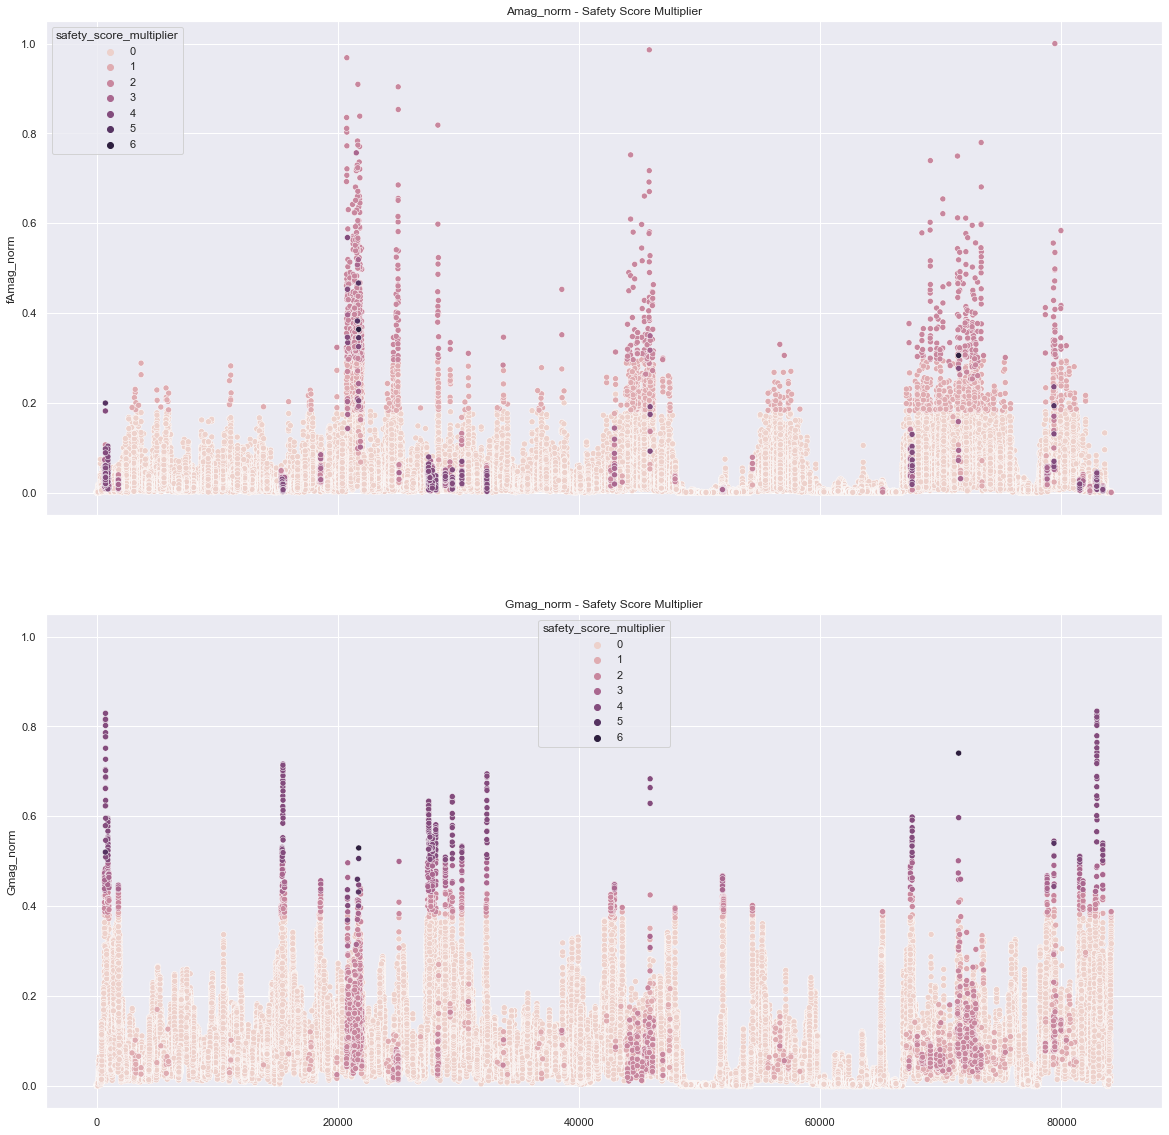

In [179]:
# Visualise safety score multiplier on data

fig, axes = plt.subplots(2,1, figsize=(20,20), sharex=True, sharey=True)

sns.scatterplot(data=IOT_accel_gyro_merge_2.sort_values(by = 'safety_score_multiplier'), ax=axes[0], x = 'hundseconds_group', y = 'fAmag_norm', hue = 'safety_score_multiplier').set(title = 'Amag_norm - Safety Score Multiplier')
axes[0].set_xlabel('')

sns.scatterplot(data=IOT_accel_gyro_merge_2.sort_values(by = 'safety_score_multiplier'), ax=axes[1], x = 'hundseconds_group', y = 'Gmag_norm', hue = 'safety_score_multiplier').set(title = 'Gmag_norm - Safety Score Multiplier')
axes[1].set_xlabel('')

fig.savefig("safety_score_multiplier Amag & Gmag")

## Safety Score Calculation 2

In [180]:
# Adding column for safety score multiplier as sum of incident columns multiplied by the normalised famag and gmag.
IOT_accel_gyro_merge_2['safety_score_multiplier'] = round(IOT_accel_gyro_merge_2[['Accel_7_fast_stop_BLR',
                                                                       'accel_8_curb_up_BLR',
                                                                       'IOT_gyro_1_curb_up_BLR',
                                                                       'IOT_gyro_2_curb_up_BLR',
                                                                       'Throw_bike_Gyro_4_DTC',
                                                                       'Throw_bike_Gyro_5_DTC']].sum(axis=1)*(IOT_accel_gyro_merge_2['fAmag_norm']*IOT_accel_gyro_merge_2['Gmag_norm']),2)

#IOT_accel_gyro_merge_2['safety_score_multiplier'] = round((IOT_accel_gyro_merge_2['safety_score_multiplier'] - IOT_accel_gyro_merge_2['safety_score_multiplier'].min())/(IOT_accel_gyro_merge_2['safety_score_multiplier'].max()-IOT_accel_gyro_merge_2['safety_score_multiplier'].min()),2)

In [ ]:
IOT_accel_gyro_merge_2.to_csv('yayaiy.csv')

In [ ]:
# Check the values in new column. See how many times incidents occur
IOT_accel_gyro_merge_2['safety_score_multiplier'].value_counts()

In [ ]:
# Checking how long incidents occur
IOT_accel_gyro_merge_incident_dur = IOT_accel_gyro_merge_2.groupby('safety_score_multiplier').agg(#Time_Start=('hundseconds_group', np.min),
                                                        #Time_End=('hundseconds_group', np.max),
                                                        Duration=('hundseconds_group_delta',np.sum))
IOT_accel_gyro_merge_incident_dur
# Remember durations in below should be multiplied by 0.001. We divided seconds to 0.001 to group them.

In [ ]:
# Multiply by 0.001 to view actual durations in seconds
IOT_accel_gyro_merge_incident_dur['Duration']=IOT_accel_gyro_merge_incident_dur['Duration']*0.01

# Preview data
IOT_accel_gyro_merge_incident_dur

In [ ]:
#Saving the dataframe as png
import dataframe_image as dfi
dfi.export(IOT_accel_gyro_merge_incident_dur,"safety_score_multiplier Duration2.png")

In [ ]:
# Visualise safety score multiplier on data

fig, axes = plt.subplots(2,1, figsize=(20,20), sharex=True, sharey=True)

sns.scatterplot(data=IOT_accel_gyro_merge_2.sort_values(by = 'safety_score_multiplier'), ax=axes[0], x = 'hundseconds_group', y = 'fAmag_norm', hue = 'safety_score_multiplier').set(title = 'Amag_norm - Safety Score Multiplier')
axes[0].set_xlabel('')

sns.scatterplot(data=IOT_accel_gyro_merge_2.sort_values(by = 'safety_score_multiplier'), ax=axes[1], x = 'hundseconds_group', y = 'Gmag_norm', hue = 'safety_score_multiplier').set(title = 'Gmag_norm - Safety Score Multiplier')
axes[1].set_xlabel('')

fig.savefig("safety_score_multiplier Amag & Gmag2")